# Objetivos  

A lo largo de este proyecto vamos a trabajar con los datos de la plataforma digital de Airbnb dedicada a ofrecer servicios de alojamientos de terceros. A través de la misma, es posible que anfitriones y huéspedes pueden valorarse mutuamente y ofrecerse referencias. Teniendo en cuenta este contexto el objetivo principal del trabajo será, entonces, entrenar un algoritmo que nos permita predecir los precios de los alojamientos en Estados Unidos a partir de los datos que provee la plataforma. 

# Contexto

Obtuvimos un dataset que contiene 74111 registros de propiedades, con sus características y respectivos precios de alojamiento. Nuestro proyecto buscará generar un modelo que sea capaz de predecir los precios con precisión y que nos de algún tipo de información acerca de qué características pueden ser relevantes para explicar los resultados. 

Teniendo en cuenta que nuestra variable es cuantitativa, utilizaremos diferentes algoritmos de aprendizaje automático supervisados de regresión, principalmente modelos de ensamble basados en Árboles de Decisión (Random Forest, Gradient Boosting y XGBoost).

# Hipótesis

Las preguntas que nos hacemos para abordar en este proyecto son:

¿Cuáles son las variables principales que pueden ayudarnos a explicar los precios de alojamiento en Estados Unidos?

En base a esta pregunta general podemos realizar las siguientes preguntas específicas:

¿El tipo de habitación en alquiler influye en los precios de alquiler?

¿Que impacto tienen las distintas ciudades?

¿Los distintos ambientes juengan algún tipo de papel (baños, habitaciones)?

¿Y los servicios particulares con los que cuenta el alojamiento (internet, tv, etc.)?

A partir de estas preguntas realizamos la siguiente hipótesis:

Los precios del alquiler están positivamente relacionados con el tipo de alquiler, la ciudad en donde se alquila y los distintos servicios con los que cuenta el inmueble.

# importamos las librerías

Vamos a importar las principales librerías a utilizar a lo largo del proyecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Dataset de airbnb

Luego importamos el dataset.

In [3]:
dataset = pd.read_csv('Airbnb_Data.csv')

Le damos un primer vistazo a nuestro data frame:

In [4]:
dataset.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Aquí tenemos un diccionario que nos permite observar que variables contiene el mismo:

id = identificador

log_price = precio del alojamiento

property_type = tipo de propiedad

room_type = tipo de habitación

amenities = comodidades ofrecidas

accomodates = alojamiento para

bathrooms = cantidad de baños

bed_type = tipo de cama

cancellation_policy = política de cancelamiento

cleaning_fee = tarifa de limpieza

city = ciudad

description = descripción

first_review = primera revisión

host_has_profile_pic = el host tiene perfil

host_identity_verified = identidad del host verificada

host_response_rate = tasa de respuesta del host

host_since = anfitrion desde

instant_bookable = reserva instantánea

last_review = última revisión

latitude = latitud

longitude = longitud

name = nombre

neighbourhood = vecindario

number_of_reviews = número de reseñas

review_scores_rating = clasificación de puntajes recibidos

thumbnail_url = url

zipcode = código postal

bedrooms = dormitorios

beds = número de camas

------

Ahora veamos las dimensiones del dataset:

In [5]:
dataset.shape

(74111, 29)

Tenemos 74111 registros y 29 variables.

También podemos ver un poco de información sobre cada variable:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

Y podemos obtener un primer acercamiento a las variables numéricas a partir de estadística descriptiva:

In [7]:
dataset.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Existen algunas variables que no nos aportan información relevante. La mayoría son códigos de identificación, nombres o fechas (ingreso y último posteo en la plataforma).

In [8]:
columnas_eliminar = ['id', 'latitude', 'longitude', 'name', 'description', 'zipcode', 'thumbnail_url',
                     'last_review', 'first_review', 'host_since']

In [9]:
dataset.drop(columnas_eliminar, axis = 1, inplace = True)

# EDA

## Análisis univariado

En primer término, vamos a visualizar la distribución de las variables numéricas.

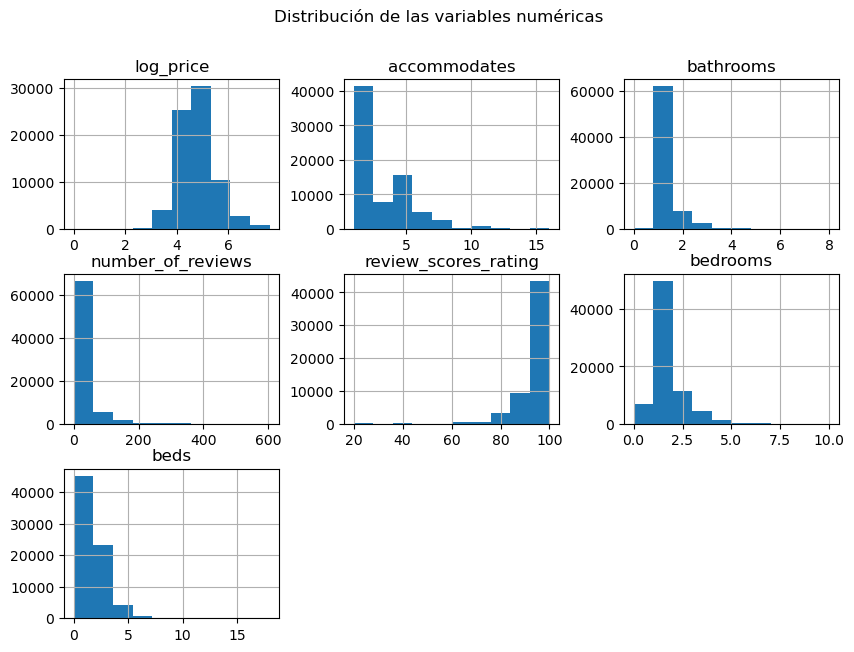

In [10]:
dataset.hist(figsize = (10,7))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

Dentro de este análisis nos llama la atención la distribución de la variable respuesta precio (log_price):

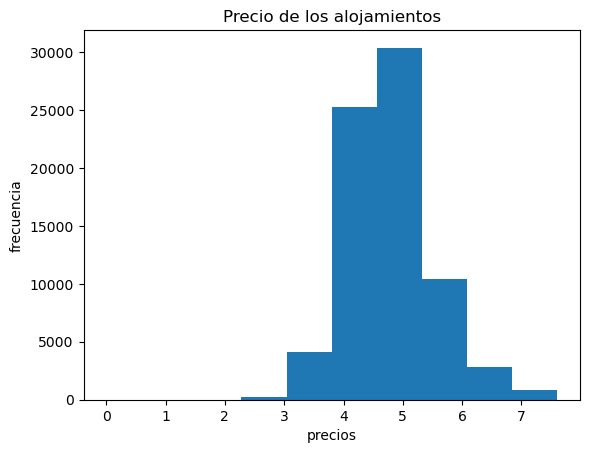

In [11]:
ax = dataset['log_price'].plot(kind = 'hist', title = 'Precio de los alojamientos')
ax.set_xlabel('precios')
ax.set_ylabel('frecuencia')
plt.show()

La media (4.78) y la mediana (4.70) se encuentran muy cerca. El dato curioso parece ser que existen algunos alojamientos con valor \\$0. Veamos cuantos son:

In [12]:
len(dataset[dataset['log_price'] == 0])

1

Consiste en un solo caso. Veamos como influye en la distribución de la variable, en caso de que lo eliminemos:

In [13]:
dataset[dataset['log_price'] == 0].index

Int64Index([11632], dtype='int64')

In [14]:
dataset.drop(11632, axis = 0, inplace = True)

Realizamos nuevamente el histograma:

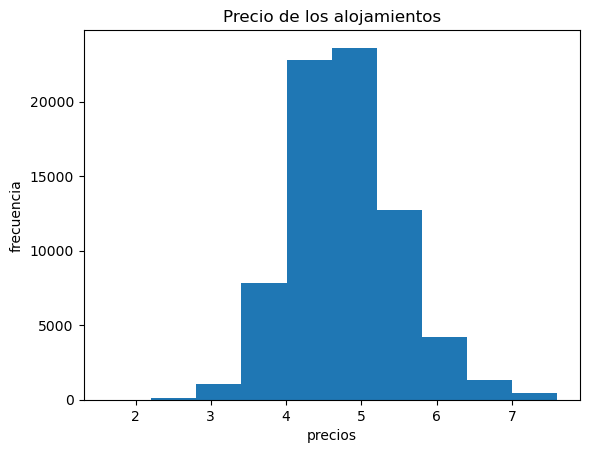

In [15]:
ax = dataset['log_price'].plot(kind = 'hist', title = 'Precio de los alojamientos')
ax.set_xlabel('precios')
ax.set_ylabel('frecuencia')
plt.show()

La variable precio ahora tiene una distribución que se asemeja a una normal.

También podemos analizarla mediante un gráfico de cajas:

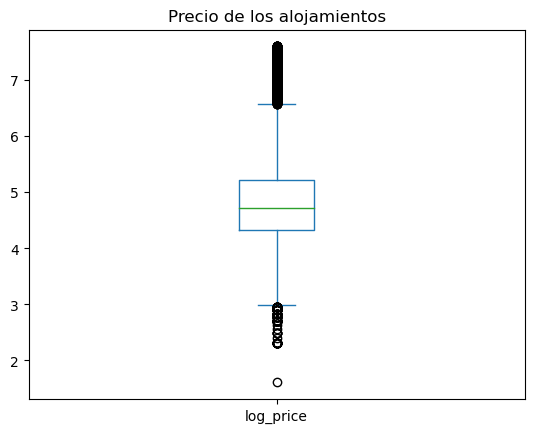

In [16]:
dataset['log_price'].plot(kind = 'box', title = 'Precio de los alojamientos')
plt.show()

Existen outliers, es decir, alojamientos con precios muy altos y muy bajos.

Para variables categóricas vamos a apelar a crear tablas de frecuencias:

In [17]:
cat = dataset.select_dtypes(['bool', 'object'])

In [18]:
cat.drop('amenities', axis = 1, inplace = True)

In [19]:
for columna in cat.columns:
    print(columna+':')
    print(dataset[columna].value_counts())
    print('-----')
    print('  ')

property_type:
Apartment             49003
House                 16511
Condominium            2657
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name:

Como podemos ver, la tasa de respuesta del host debería ser numérica:

In [20]:
dataset['host_response_rate'] = dataset['host_response_rate'].str.replace('%', '')

In [21]:
dataset['host_response_rate'] = dataset['host_response_rate'].astype('float')

## Análisis bivariado

Ahora veamos si existe alguna correlación entre variables:

In [22]:
num = dataset.select_dtypes([int, float])

En variables numéricas utilizaremos una matriz de correlación:

In [23]:
num.corr()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.000000,0.567658,0.355490,-0.006738,-0.032522,0.091148,0.473327,0.442236
accommodates,0.567658,1.000000,0.505631,0.047043,0.041958,-0.017144,0.709259,0.810800
bathrooms,0.355490,0.505631,1.000000,0.006537,-0.041384,0.010531,0.589935,0.525590
host_response_rate,-0.006738,0.047043,0.006537,1.000000,0.123069,0.094403,0.020569,0.041521
number_of_reviews,-0.032522,0.041958,-0.041384,0.123069,1.000000,0.011699,-0.035151,0.031105
review_scores_rating,0.091148,-0.017144,0.010531,0.094403,0.011699,1.000000,0.011138,-0.027339
bedrooms,0.473327,0.709259,0.589935,0.020569,-0.035151,0.011138,1.000000,0.709415
beds,0.442236,0.810800,0.525590,0.041521,0.031105,-0.027339,0.709415,1.000000


También podemos visualizar esto mediante una matriz de dispersión:

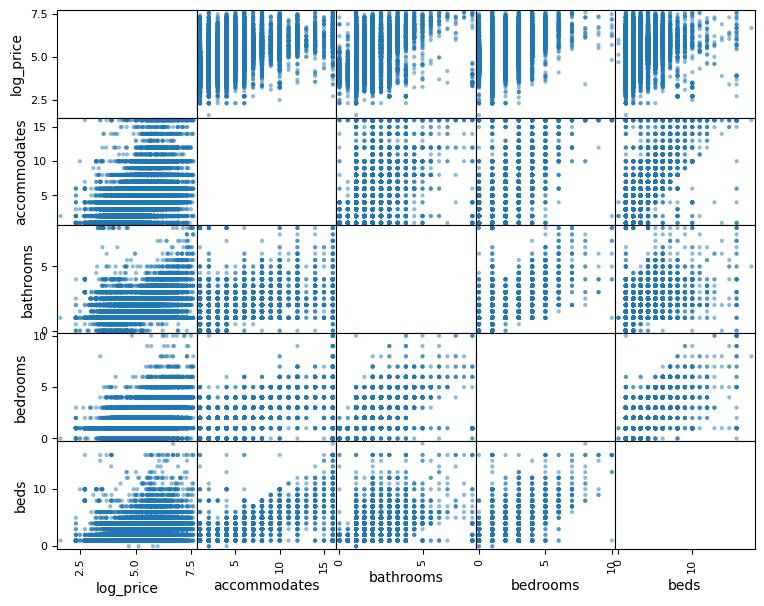

In [24]:
pd.plotting.scatter_matrix(num[['log_price','accommodates', 'bathrooms', 'bedrooms', 'beds']], figsize = (9,7), diagonal = None)
plt.show()

Si bien las correlaciones no parecen ser fuertes, podemos ver algunos patrones lineales positivos principalmente entre el precio, la cantidad de baños, camas y cantidad de habitaciones.

Para visualizar relaciones con variables categóricas vamos a utilizar gráficos de cajas:

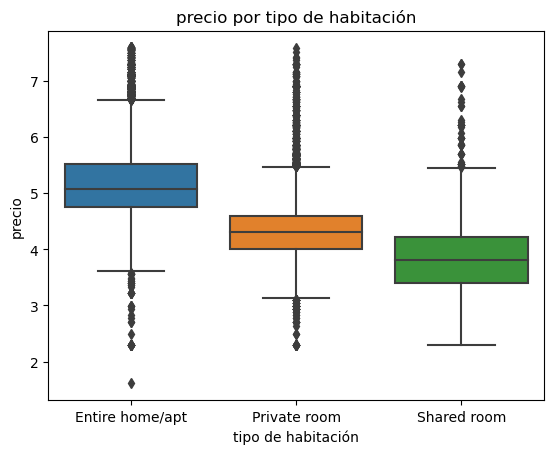

In [24]:
ax = sns.boxplot(x = 'room_type', y= 'log_price', data = dataset)
ax.set_title('precio por tipo de habitación')
ax.set_ylabel('precio')
ax.set_xlabel('tipo de habitación')

plt.show()

Parece haber algún tipo de relación entre el tipo de alquiler y el precio. Aquellos lugares donde se alquila toda la casa (entire home) son más caros que aquellos en donde se alquila una habitación. Por su parte, las habitaciones privadas (private room) parecen ser un poco más caras que las habitaciones compartidas (shared room).

Ahora veamos por tipo de cama:

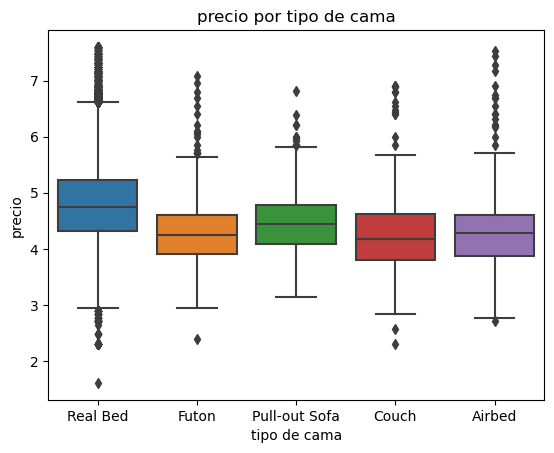

In [25]:
ax = sns.boxplot(x = 'bed_type', y= 'log_price', data = dataset)
ax.set_title('precio por tipo de cama')
ax.set_ylabel('precio')
ax.set_xlabel('tipo de cama')

plt.show()

La cama real parece sobresalir o ser más cara que otro tipo de modalidades.

Veamos el rol de la tarifa de limpieza.

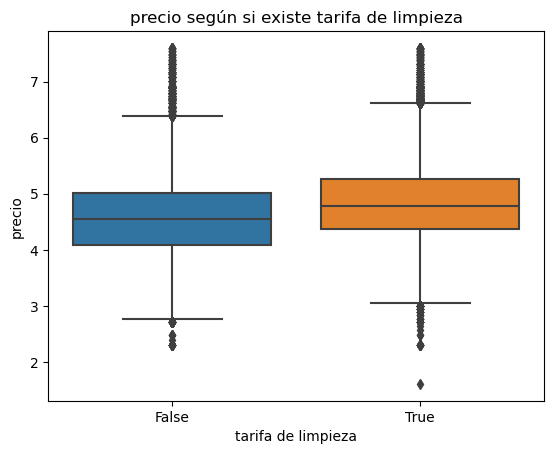

In [26]:
ax = sns.boxplot(x = 'cleaning_fee', y= 'log_price', data = dataset)
ax.set_title('precio según si existe tarifa de limpieza')
ax.set_ylabel('precio')
ax.set_xlabel('tarifa de limpieza')

plt.show()

Parece que esta variable no incide mucho en el precio de los host. Parece haber una pequeña diferencia donde la tarifa eleva un poco el precio.

Por otra parte, podemos ver si existe alguna diferencia entre ciudades.

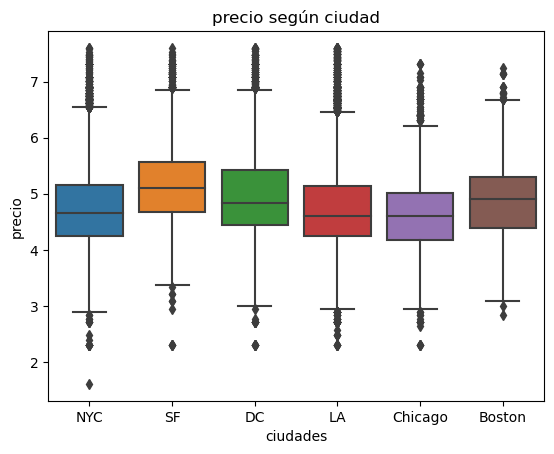

In [27]:
ax = sns.boxplot(x = 'city', y= 'log_price', data = dataset)
ax.set_title('precio según ciudad')
ax.set_ylabel('precio')
ax.set_xlabel('ciudades')

plt.show()

Existen algunas ciudades un poco más caras que las demás (SF, DC, Boston).

Veamos si la política de cancelación puede tener algún efecto:

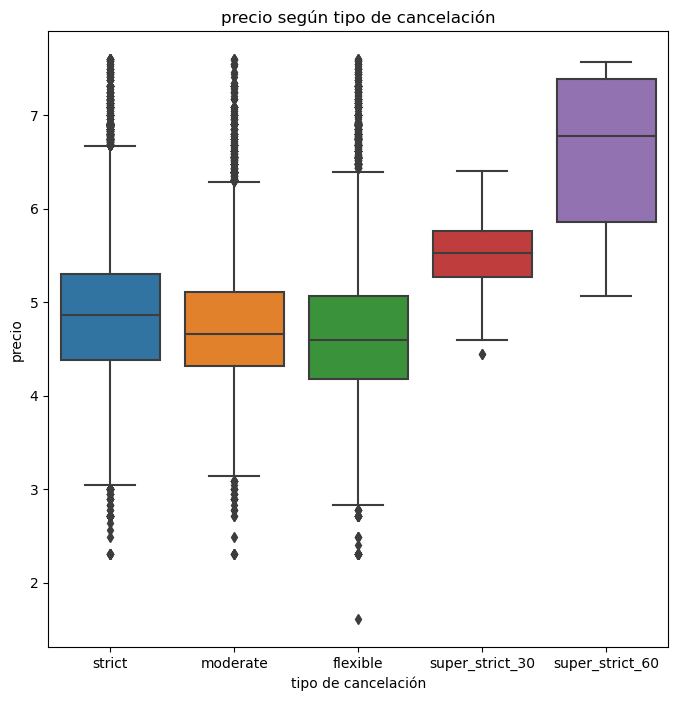

In [28]:
fig, ax = plt.subplots(figsize = (8,8))

sns.boxplot(x = 'cancellation_policy', y= 'log_price', data = dataset, ax= ax)
ax.set_title('precio según tipo de cancelación')
ax.set_ylabel('precio')
ax.set_xlabel('tipo de cancelación')

plt.show()

Las cancelaciones super estrictas suelen ser más caras que las otras tres modalidades (estricta, moderada y flexible).

# Data wrangling

Antes de poder modelar nuestro dataset tenemos que realizar un preprocesamiento de datos.

## eliminar duplicados

Lo primero que debemos controlar es que no exista información redundante entre nuestros datos. Veamos si existen duplicados:

In [29]:
dataset.duplicated().sum()

48

Son 48 datos identicos. Procedemos a borrarlos.

In [30]:
dataset.drop_duplicates(inplace = True)

Veamos el resultado:

In [31]:
dataset.duplicated().sum()

0

## Imputar datos nulos

Otro problema que tenemos que tratar de nuestro data frame son los datos nulos. En este caso vamos a imputarlos. Primero veamos que variables poseen datos nulos:

In [32]:
dataset.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   199
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18290
instant_bookable              0
neighbourhood              6860
number_of_reviews             0
review_scores_rating      16681
bedrooms                     91
beds                        131
dtype: int64

En los casos de las variables baños, piezas y cantidad de camas, vimos en el EDA que tienen una distribución asimétrica. Para imputar estos casos deberíamos utilizar la mediana.

In [33]:
dataset['bathrooms'].median()

1.0

In [34]:
dataset['bedrooms'].median()

1.0

In [35]:
dataset['beds'].median()

1.0

Para la tres variables la mediana es 1.

In [36]:
imputer = SimpleImputer(missing_values= np.nan, strategy= 'median')

In [37]:
dataset[['bathrooms', 'bedrooms','beds']] = imputer.fit_transform(dataset[['bathrooms', 'bedrooms', 'beds']])

Para imputar las siguientes variables categóricas vamos a utilizar la moda a partir de la siguiente función:

In [38]:
imp_cat = SimpleImputer(missing_values= np.nan, strategy = 'most_frequent')

In [39]:
dataset[['host_has_profile_pic', 'host_identity_verified']] = imp_cat.fit_transform(dataset[['host_has_profile_pic', 'host_identity_verified']])

Las variables de respuesta del host y la puntuación del rating tienen más de datos faltantes (alrededor del 22% del total). Es por ello que para imputar vamos a utilizar el algoritmo de vecinos más cercanos (KNN).

In [40]:
imp_knn = KNNImputer(n_neighbors=5)

In [41]:
dataset[['host_response_rate', 'review_scores_rating']] = imp_knn.fit_transform(dataset[['host_response_rate', 'review_scores_rating']])

La variable vecindario es problemática ya que no solo tiene una buena cantidad de datos faltantes, sino también porque tiene 619 categorías (vecindarios). Es posible que esta variable agregue ruido a nuestro modelo, por ello hemos decidido eliminarla.

In [42]:
dataset.drop('neighbourhood', axis = 1, inplace = True)

In [43]:
dataset.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

## Tratamiento de outliers

Antes de tratar los casos atípicos, vamos a subdividir nuestro dataset según el tipo de variable:

In [44]:
num = dataset.select_dtypes(['int', 'float'])
cat = dataset.select_dtypes(['object', 'bool'])

Vamos a utilizar el método IQR para detectar los datos atípicos:

In [45]:
def IQR(variable):
    q1 = np.percentile(variable,25)
    q3 = np.percentile(variable,75)
    iqr = q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    indices = list(variable[(variable > upper) | (variable < lower)].index)

    print(f'La variable {variable.name} posee {len(indices)} outliers. Un {round(len(indices)/len(variable)*100,2)}% del total.')
    return indices

Aplicamos la función:

In [46]:
outliers = dict()

for i in num.columns:
    outliers[i] = IQR(num[i])

La variable log_price posee 1530 outliers. Un 2.07% del total.
La variable accommodates posee 3599 outliers. Un 4.86% del total.
La variable bathrooms posee 15795 outliers. Un 21.33% del total.
La variable host_response_rate posee 6348 outliers. Un 8.57% del total.
La variable number_of_reviews posee 8203 outliers. Un 11.08% del total.
La variable review_scores_rating posee 4058 outliers. Un 5.48% del total.
La variable bedrooms posee 24230 outliers. Un 32.72% del total.
La variable beds posee 5680 outliers. Un 7.67% del total.


Muchas de las variables con outliers tienen el mismo valor en la gran mayoría de los casos. Por ejemplo, los cuartiles nos revelan que los alquileres suelen tener un solo baño. Solo unos pocos casos tienen más de uno.

In [47]:
dataset.describe()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
count,74062.000000,74062.000000,74062.000000,74062.000000,74062.000000,74062.000000,74062.000000,74062.000000
mean,4.782182,3.154735,1.234445,94.628763,20.914072,93.901292,1.265507,1.709554
std,0.716906,2.152472,0.581080,14.255555,37.837493,6.947732,0.851730,1.252864
min,1.609438,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,94.353152,1.000000,92.200000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,100.000000,6.000000,94.067758,1.000000,1.000000
75%,5.220356,4.000000,1.000000,100.000000,23.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,100.000000,605.000000,100.000000,10.000000,18.000000


Los outliers quedan almacenados en el diccionario. De todos modos, nos los trataremos por el momento dado que los modelos basados en árboles suelen ser bastante robustos frente a estos casos.

# Feature Engineering

Ahora nos toca transformar variables. Principalmente vamos a encodear las variables categóricas.

## Encoding

La variable más compleja de tratar es amenities, dado que contiene varias categorías en un formato tipo cadena de texto de la siguiente manera: 

In [48]:
cat['amenities'].head()

0    {"Wireless Internet","Air conditioning",Kitche...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,"Cable TV","Wireless Internet","Air condit...
3    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4    {TV,Internet,"Wireless Internet","Air conditio...
Name: amenities, dtype: object

Antes de encodear tenemos que hacerle algún tipo de limpieza a la misma.

In [49]:
cat['amenities'] = cat['amenities'].str.replace("{", "").str.replace("}", "").str.replace('"','').str.replace("'", "")

In [50]:
cat['amenities'].head()

0    Wireless Internet,Air conditioning,Kitchen,Hea...
1    Wireless Internet,Air conditioning,Kitchen,Hea...
2    TV,Cable TV,Wireless Internet,Air conditioning...
3    TV,Cable TV,Internet,Wireless Internet,Kitchen...
4    TV,Internet,Wireless Internet,Air conditioning...
Name: amenities, dtype: object

Ahora transformamos el texto de cada registro en una lista:

In [51]:
cat['amenities'] = cat['amenities'].str.split(',')

In [52]:
cat['amenities'].head()

0    [Wireless Internet, Air conditioning, Kitchen,...
1    [Wireless Internet, Air conditioning, Kitchen,...
2    [TV, Cable TV, Wireless Internet, Air conditio...
3    [TV, Cable TV, Internet, Wireless Internet, Ki...
4    [TV, Internet, Wireless Internet, Air conditio...
Name: amenities, dtype: object

Vamos a unificar todas las categorías en una sola lista para ver cuantas son:

In [53]:
categorias = []

for categ in cat['amenities']:
    categorias.extend(categ)

In [54]:
categorias = pd.Series(categorias).value_counts()

In [55]:
categorias.head(15)

Wireless Internet            71222
Kitchen                      67485
Heating                      67032
Essentials                   63966
Smoke detector               61689
Air conditioning             55173
TV                           52424
Shampoo                      49438
Hangers                      49137
Carbon monoxide detector     47154
Internet                     44623
Laptop friendly workspace    43669
Hair dryer                   43297
Washer                       43132
Dryer                        42675
dtype: int64

In [56]:
len(categorias)

131

Son 131 categorías en total. Vamos a quedarnos con las 15 más frecuentes:

In [57]:
lista = categorias.head(15).index

lista

Index(['Wireless Internet', 'Kitchen', 'Heating', 'Essentials',
       'Smoke detector', 'Air conditioning', 'TV', 'Shampoo', 'Hangers',
       'Carbon monoxide detector', 'Internet', 'Laptop friendly workspace',
       'Hair dryer', 'Washer', 'Dryer'],
      dtype='object')

Y encodeamos de la siguiente manera:

In [58]:
cat_enc = pd.DataFrame()

for amen in lista:
    cat_enc['amenities_' + amen] = cat['amenities'].apply(lambda x: 1 if amen in x else 0)

In [59]:
cat_enc.head()

,amenities_Wireless Internet,amenities_Kitchen,amenities_Heating,amenities_Essentials,amenities_Smoke detector,amenities_Air conditioning,amenities_TV,amenities_Shampoo,amenities_Hangers,amenities_Carbon monoxide detector,amenities_Internet,amenities_Laptop friendly workspace,amenities_Hair dryer,amenities_Washer,amenities_Dryer
0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1
2,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0
3,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1
4,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0


Luego realizamos la técnica one hot encoder en las siguientes variables categóricas.

In [60]:
encoder = ['room_type', 'bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic',
          'host_identity_verified', 'instant_bookable']

In [61]:
cat_enc = pd.concat([cat_enc, pd.get_dummies(cat[encoder])], axis = 1)

Ahora vamos a encodear la variable booleana.

In [62]:
cat_enc['cleaning_fee'] = pd.Series(np.where(cat['cleaning_fee'] == True, 1, 0), index= cat_enc.index)

Para transformar la variable property_type, que tiene muchas categorías, vamos a utilizar el método de labelencoder.

In [63]:
label = LabelEncoder()

In [64]:
prop = label.fit_transform(cat[['property_type']])

In [65]:
cat_enc = pd.concat([cat_enc, pd.Series(prop, index = cat_enc.index, name= 'property_type')], axis = 1)

Una vez que transformamos las variables reunificamos nuestro dataset:

In [66]:
data_trans = pd.concat([num, cat_enc], axis = 1)

In [67]:
data_trans.shape

(74062, 50)

El encodeo nos aumento el número de columnas. A partir de este punto es necesario realizar algún tipo de selección de variables. Sin embargo, los algoritmos basados en árboles de decisión seleccionan automáticamente las variables más relevantes.

# Modelamiento

Antes de crear nuestros modelos, primero tenemos que subdividir nuestros datos en un conjunto de entrenamiento y otro de testeo.

In [68]:
x = data_trans.drop('log_price', axis = 1)
y = data_trans['log_price']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 142)

## Random Forest

Probamos el algoritmo Random Forest.

In [70]:
rf = RandomForestRegressor(n_estimators= 50, random_state= 412)

In [71]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=412)

In [72]:
pred = rf.predict(x_train)

Vemos el error absoluto medio en el conjunto de entrenamiento.

In [73]:
mean_absolute_error(y_train, pred)

0.12660632304245464

Y leugo en el conjunto de testing.

In [74]:
pred = rf.predict(x_test)

In [75]:
mean_absolute_error(y_test, pred)

0.33553302449310557

Parece existir un cierto sobreajuste (el conjunto de testeo funciona mucho mejor que el conjunto de test. El modelo no generaliza tan bien).

Veamos las variables más relevantes.

In [77]:
pd.DataFrame({'variables': x.columns, 'importancia': rf.feature_importances_}).sort_values('importancia', ascending=False).head(5)

,variables,importancia
22,room_type_Entire home/apt,0.366121
1,bathrooms,0.127604
3,number_of_reviews,0.060900
0,accommodates,0.038720
4,review_scores_rating,0.037810


Veamos si podemos optimizar el modelo y regular el sobreajuste:

In [81]:
params = {'n_estimators': [50,100,150], 'max_depth' : [7,11,15,None]}

In [82]:
grid = RandomizedSearchCV(estimator= RandomForestRegressor(), param_distributions= params,
                   cv = 5, scoring= 'neg_mean_absolute_error', n_iter= 5)

In [83]:
grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [7, 11, 15, None],
                                        'n_estimators': [50, 100, 150]},
                   scoring='neg_mean_absolute_error')

In [84]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 15}

Una vez obtenidos los hiperparámetros, volvemos a probar el algoritmo.

In [78]:
rf = RandomForestRegressor(n_estimators= 100, max_depth= 15, random_state= 412)

In [79]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, random_state=412)

In [80]:
pred = rf.predict(x_train)

Vemos los resultados en el conjunto de entrenamiento.

In [81]:
mean_absolute_error(y_train, pred)

0.2557801027113502

In [82]:
pred = rf.predict(x_test)

Y en el de testeo.

In [83]:
mean_absolute_error(y_test, pred)

0.3295393664966382

Parece haberse corregido bastante el problema del sobre-ajuste.

Veamos las variables más relevantes.

In [84]:
pd.DataFrame({'variables': x.columns, 'importancia': rf.feature_importances_}).sort_values('importancia', ascending=False).head(5)

,variables,importancia
22,room_type_Entire home/apt,0.458918
1,bathrooms,0.154959
0,accommodates,0.037971
3,number_of_reviews,0.037615
5,bedrooms,0.030661


## Gradient Boosting

Ahora probemos el algoritmo Gradient Boosting:

In [85]:
gb = GradientBoostingRegressor(n_estimators= 150, max_depth=5, learning_rate= 0.1, random_state= 142)

In [86]:
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=142)

In [87]:
pred = gb.predict(x_train)

In [88]:
mean_absolute_error(y_train, pred)

0.31538829795157386

In [89]:
pred = gb.predict(x_test)

In [90]:
mean_absolute_error(y_test, pred)

0.3262174142360259

El modelo generaliza mucho mejor que Random Forest, ya que no sufre sobre-ajuste. Ahora veamos las variables principales. 

In [91]:
pd.DataFrame({'variables': x.columns, 'importancia': gb.feature_importances_}).sort_values('importancia', ascending=False).head(5)

,variables,importancia
22,room_type_Entire home/apt,0.534278
1,bathrooms,0.156364
0,accommodates,0.060700
5,bedrooms,0.040223
3,number_of_reviews,0.030067


Veamos si encontramos mejores hiperparámetros.

In [99]:
params = {'n_estimators': [50,100,150], 'learning_rate': [0.1, 0.01, 0.001]}

In [100]:
grid = RandomizedSearchCV(estimator= GradientBoostingRegressor(), param_distributions= params,
                   cv = 5, scoring= 'neg_mean_absolute_error', n_iter= 5)

In [101]:
grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'n_estimators': [50, 100, 150]},
                   scoring='neg_mean_absolute_error')

Los hiperparámetros son iguales a los de nuestro modelo inicial.

In [102]:
grid.best_params_

{'n_estimators': 150, 'learning_rate': 0.1}

## XGBoost

Ahora vamos a probar el algoritmo XGBoost.

In [92]:
xgb = XGBRegressor(n_estimators= 200, learning_rate= 0.1, random_state= 142)

In [93]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=142, ...)

In [94]:
pred = xgb.predict(x_train)

In [95]:
mean_absolute_error(y_train, pred)

0.3014750954380356

In [96]:
pred = xgb.predict(x_test)

In [97]:
mean_absolute_error(y_test, pred)

0.32395617891769296

El resultado del modelo también es muy bueno y no sufre sobre-ajuste como random forest.

In [98]:
pd.DataFrame({'variables': x.columns, 'importancia': xgb.feature_importances_}).sort_values('importancia', ascending=False).head(5)

,variables,importancia
22,room_type_Entire home/apt,0.731819
1,bathrooms,0.042505
40,city_SF,0.026943
23,room_type_Private room,0.021934
38,city_LA,0.017704


Veamos si con una optimización de hiperparámetros podemos mejorar el modelo.

In [117]:
params = {'n_estimators': [50,100,150], 'learning_rate': [0.1, 0.01, 0.001]}

In [118]:
grid = RandomizedSearchCV(estimator= XGBRegressor(), param_distributions= params,
                   cv = 5, scoring= 'neg_mean_absolute_error', n_iter= 5)

In [119]:
grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'n_estimators': [50, 100, 150]},
                   scoring='neg_mean_absolute_error')

In [121]:
grid.best_params_

{'n_estimators': 150, 'learning_rate': 0.1}

Probamos los nuevos hiperparámetros:

In [99]:
xgb = XGBRegressor(n_estimators= 150, learning_rate= 0.1, random_state= 142)

In [100]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=142, ...)

In [101]:
pred = xgb.predict(x_train)

In [102]:
mean_absolute_error(y_train, pred)

0.30609049062040683

In [103]:
pred = xgb.predict(x_test)

In [104]:
mean_absolute_error(y_test, pred)

0.3246923168719821

El resultado no mejora demasiado.

In [105]:
pd.DataFrame({'variables': x.columns, 'importancia': xgb.feature_importances_}).sort_values('importancia', ascending=False).head(5)

,variables,importancia
22,room_type_Entire home/apt,0.744138
1,bathrooms,0.043109
40,city_SF,0.024916
23,room_type_Private room,0.021183
38,city_LA,0.015847


# Conclusiones

Si bien en los conjuntos de testeo los tres algoritmos tuvieron practicamente la misma precisión, los modelos basados en ensambles tipo boosting (Gradient Boosting y XGBoost) mostraron una menor tendencia a overfitear (los resultados en los conjuntos de entrenamiento y testeo fueron similares). Esto nos demuestra que estos modelos son capaces de generalizar mejor que el modelo de random forest. En este último, los resultados del conjunto de entrenamiento son mejores que en los de testeo. En nuestra primera prueba el overfitting era bastante claro en este modelo, aunque luego mejoró con la optimización de hiperparámetros. 

Por otra parte, los tres modelos nos mostraron la predominancia de una variable explicativa: el tipo de habitación. Como hemos visto durante nuestro EDA, los alquileres que se realizan sobre una casa entera tienen un precio superior a los que alquilan una sola habitación (sea esta privada o compartida). En segundo rango de importancia, la cantidad de baños aparece reflejada en los tres modelos. Según vimos en nuestro EDA la relación entre el precio y el número de baños es directa, cuando aumenta uno también lo hace la otra. Es posible que los alojamientos con más de un baño sean más caros que los que solo tienen uno. 

Las dos variables mencionadas representan un 60% de explicación del modelo en Random Forest, un 68% en Gradient Boosting y un 78% en XGBoost. En los modelos también se repiten, en menor grado de importancia, las ciudades de San Francisco (SF) y Los Ángeles (LA). Según nuestro EDA, SF tiene precios superiores a otras ciudades mientras que LA se muestra con precios más bajos.